# AC Access by Household Income

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
AC_Income = pd.read_csv("../Data/AC_Income_CONDENSED.csv")

In [3]:
AC_Income.head()

,YEAR,INCOME_MIN,INCOME_MAX,H_NO_AC,H_YES_AC,PROP_AC,POP_TOT,PROP_POP
0,2005,0,19999.0,5.3,21.5,0.802239,26.8,0.241007
1,2005,20000,39999.0,4.7,24.1,0.836806,28.8,0.258993
2,2005,40000,59999.0,2.8,17.8,0.864078,20.6,0.185252
3,2005,60000,79999.0,1.9,11.2,0.854962,13.1,0.117806
4,2005,80000,NaN,3.1,18.8,0.858447,21.9,0.196942


In [4]:
print(AC_Income['INCOME_MIN'])

0         0
1     20000
2     40000
3     60000
4     80000
5         0
6     20000
7     40000
8     60000
9     80000
10        0
11    20000
12    40000
13    60000
14    80000
15        0
16    20000
17    40000
18    60000
19    80000
Name: INCOME_MIN, dtype: int64


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Proportion with Cooling Systems')]

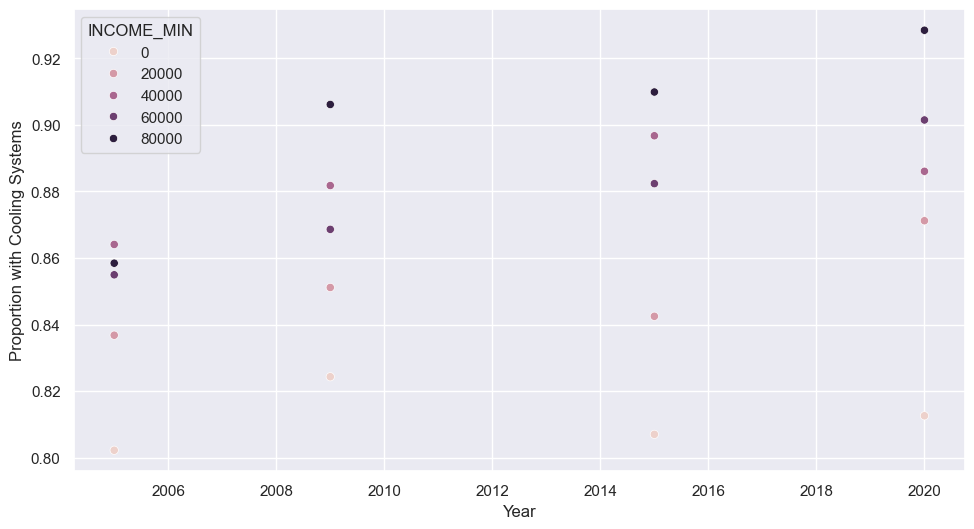

In [5]:
sns.set(rc={'figure.figsize':(11.5,6)})
ax = sns.scatterplot(data=AC_Income, x="YEAR", y="PROP_AC", hue="INCOME_MIN")
ax.set(xlabel='Year', ylabel='Proportion with Cooling Systems')

In [6]:
income_mins = [0, 20000, 40000, 60000, 80000]
income_maxes = ['19999', '39999', '59999', '79999', '']
years = [2005, 2009, 2015, 2020]
AC_props = np.array([np.array(AC_Income.loc[(AC_Income['INCOME_MIN']==income)]['PROP_AC']) for income in income_mins])

print("\t", end='')
for income in range(len(income_mins)):
    print(str(income_mins[income]) + '-' + income_maxes[income] + '\t', end='')
    if income == 0:
        print(end='\t')
print()
for year in range(len(years)):
    print(years[year], end='')
    for income_level in range(len(AC_props)):
        print('\t' + str(AC_props[income_level][year]), end='')
    print()

print(AC_props)

	0-19999		20000-39999	40000-59999	60000-79999	80000-	
2005	0.802238806	0.836805556	0.86407767	0.854961832	0.858447489
2009	0.824324324	0.851145038	0.881773399	0.868613139	0.906137184
2015	0.807017544	0.842490842	0.89673913	0.882352941	0.909883721
2020	0.812600107	0.871208974	0.886056972	0.90147961	0.928443114
[[0.80223881 0.82432432 0.80701754 0.81260011]
 [0.83680556 0.85114504 0.84249084 0.87120897]
 [0.86407767 0.8817734  0.89673913 0.88605697]
 [0.85496183 0.86861314 0.88235294 0.90147961]
 [0.85844749 0.90613718 0.90988372 0.92844311]]


In [7]:
def linear(x, m, b):
    return m * x + b

In [8]:
fits = []
for income in range(len(income_mins)):
    # print(years, AC_props[income])
    parameters, covariance = curve_fit(linear, years, AC_props[income])
    fits.append(parameters)
fits = np.array(fits)
print(fits)

[[ 1.65687789e-04  4.78139937e-01]
 [ 1.80235342e-03 -2.77637306e+00]
 [ 1.54988458e-03 -2.23659344e+00]
 [ 2.99404625e-03 -5.14791769e+00]
 [ 4.04530914e-03 -7.23944543e+00]]


In [9]:
x = np.linspace(2005, 2020, 500)
y_pred = []
for i in range(len(fits)):
    y_pred.append(linear(x, fits[i][0], fits[i][1]))
y_pred = np.array(y_pred)
y_pred_df = pd.DataFrame({'x':x, 'y0':y_pred[0], 'y1':y_pred[1], 'y2':y_pred[2], 'y3':y_pred[3],'y4':y_pred[4]})

<Axes: xlabel='Year', ylabel='Proportion with Cooling Systems'>

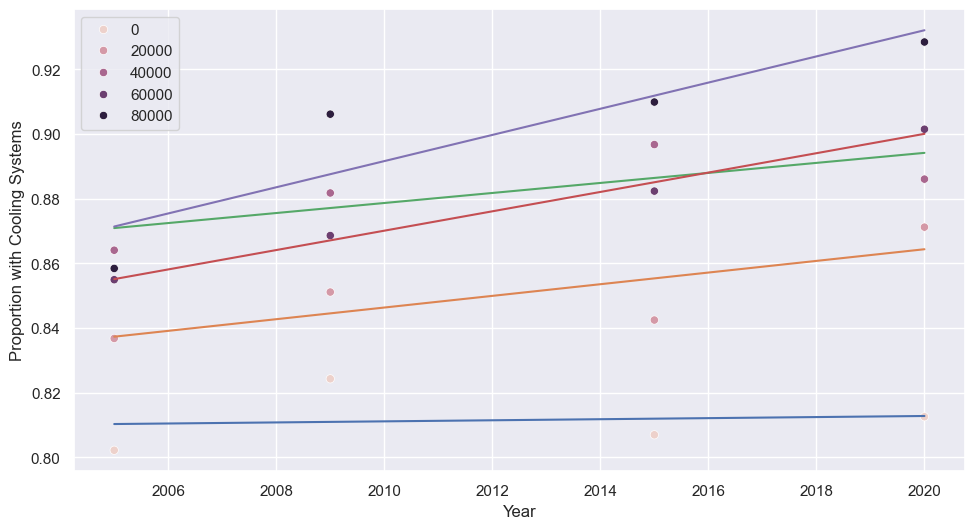

In [10]:
sns.cubehelix_palette(as_cmap=True)
ax = sns.scatterplot(data=AC_Income, x="YEAR", y="PROP_AC", hue="INCOME_MIN")
ax.set(xlabel='Year', ylabel='Proportion with Cooling Systems')
sns.lineplot(x='x', y='y0', data=y_pred_df)
sns.lineplot(x='x', y='y1', data=y_pred_df)
sns.lineplot(x='x', y='y2', data=y_pred_df)
sns.lineplot(x='x', y='y3', data=y_pred_df)
sns.lineplot(x='x', y='y4', data=y_pred_df)

In [21]:
for i in range(5):
    print(round((1 - fits[i][1])/fits[i][0]))
    print(linear(2030, fits[i][0], fits[i][1]))

3150
0.8144861491229188
2095
0.8824043756826012
2088
0.909672243960931
2053
0.9299962014410799
2037
0.9725321141498267


In [12]:
file_path = open('./final_datasets/AC_Access/fits.pkl', 'wb')
pkl.dump(fits, file_path)
file_path.close()

[[0.80223881 0.82432432 0.80701754 0.81260011]
 [0.83680556 0.85114504 0.84249084 0.87120897]
 [0.86407767 0.8817734  0.89673913 0.88605697]
 [0.85496183 0.86861314 0.88235294 0.90147961]
 [0.85844749 0.90613718 0.90988372 0.92844311]]


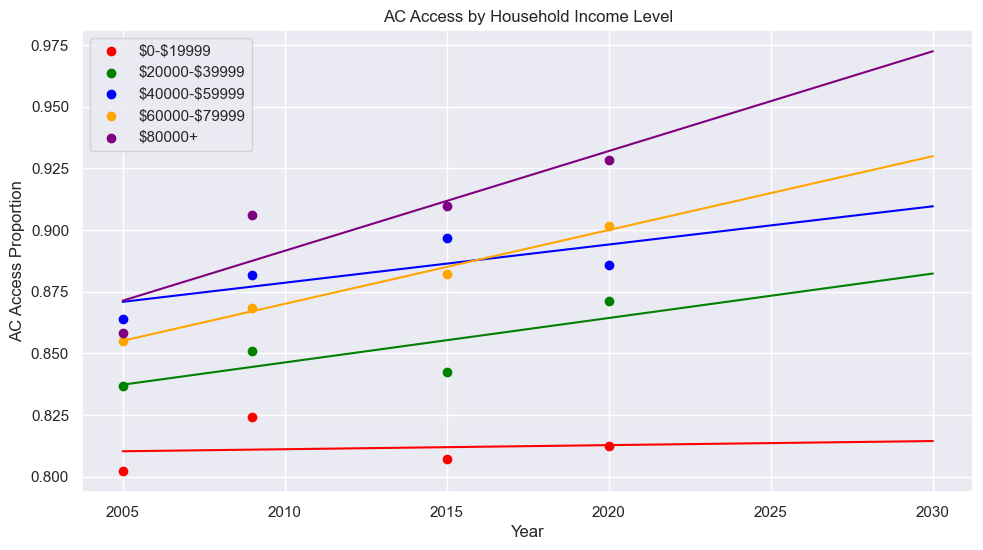

In [20]:
print(AC_props)
income_bracket_labels = ['\$0-\$19999', '\$20000-\$39999', '\$40000-\$59999', '\$60000-\$79999', '\$80000+']
years = [2005, 2009, 2015, 2020]
colors = ['red', 'green', 'blue', 'orange', 'purple']
x = np.arange(2005, 2031, 1)
fig, ax = plt.subplots(nrows=1, ncols=1)
# ax.set_facecolor('white')
for i in range(5):
    ax.scatter(years, AC_props[i], color=colors[i], label=income_bracket_labels[i])
    ax.plot(x, fits[i][0] * x + fits[i][1], color=colors[i])

ax.set_xlabel('Year')
ax.set_ylabel('AC Access Proportion')
ax.set_title('AC Access by Household Income Level')
ax.legend()
plt.savefig('./final_figures/MISC_figures/ACAccess.png', dpi=200, bbox_inches='tight')